Original Image - Min: 8562.0, Max: 43690.0
Augmented Image - Min: 1.0, Max: 1.0


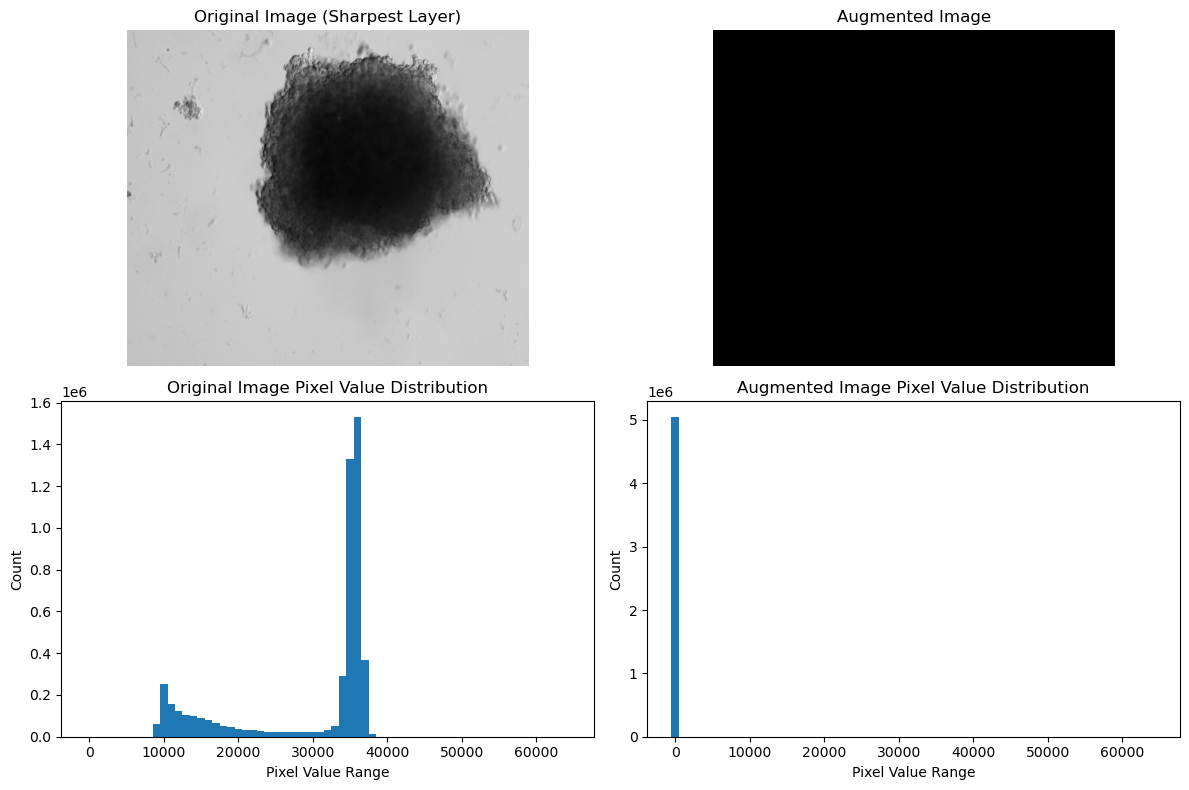

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
#original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=original_image_tensor.shape[1:], scale=(0.8, 1.0)),  # Use tensor size directly
    transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5,saturation=0.5,hue=0.5)], p=1),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values in the range 0–65535
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (can adjust the bin width as needed)
    bins = np.arange(0, 65536, 1000)  # 1000-wide bins
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=1000)
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


Original Image - Min: 0.13064774870872498, Max: 0.6666666865348816
Augmented Image - Min: 0.0, Max: 1.0


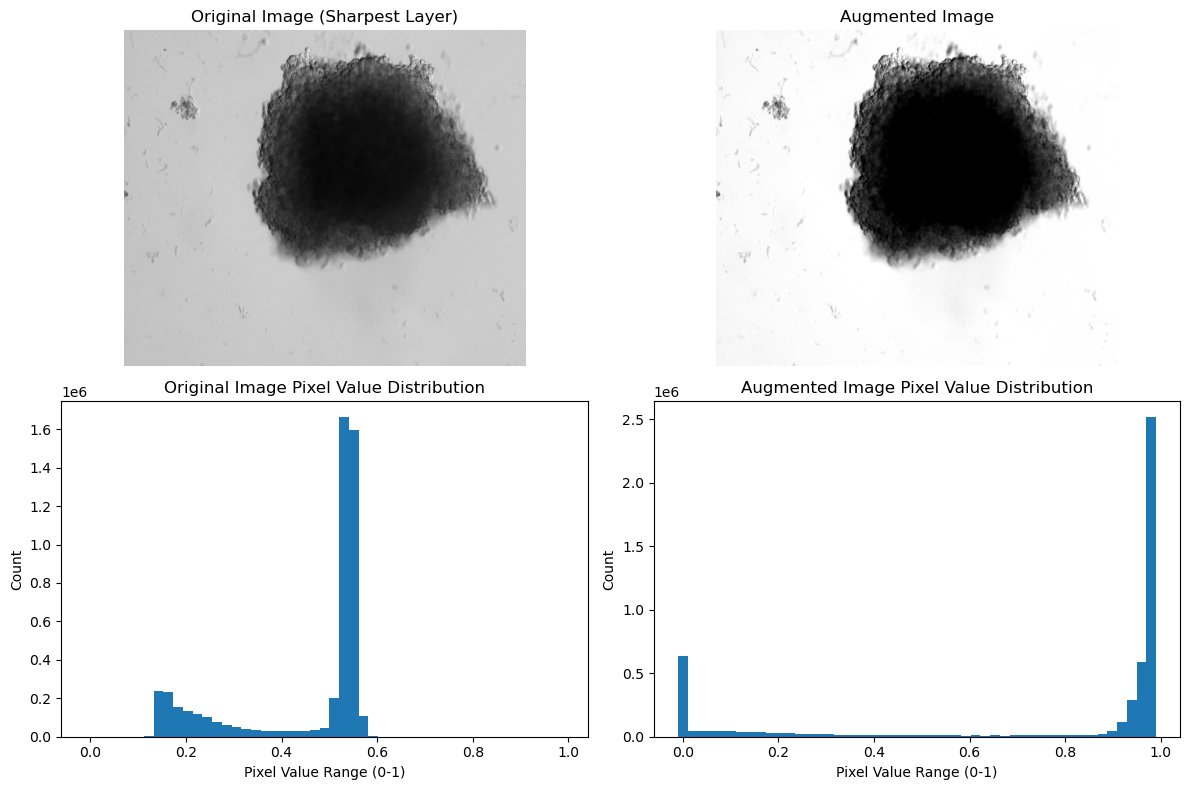

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)/ 65535.0

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    #transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=96),  # Use tensor size directly
    transforms.RandomApply([transforms.ColorJitter(brightness=1, contrast=1,saturation=1,hue=0)], p=1),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (range between 0 and 1)
    bins = np.linspace(0, 1, 50)  # 50 bins between 0 and 1
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=(bins[1] - bins[0]))
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range (0-1)')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


Totensor() doesn't do sacling to 0,1 but it convert to tensor so if its 16 bit so we had to divide 65355 by our self.

In [13]:
from PIL import Image
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Manuscript\notes\figures\1dop2.png'  # Replace with your image path
image = Image.open(img_path)

# Print original image mode and size
print(f"Original Image Mode: {image.mode}, Size: {image.size}")

# Define the transformation
to_tensor = transforms.ToTensor()

# Convert the image to a tensor
image_tensor = to_tensor(image)
print(f"Original Image - Min: {image_tensor.min()}, Max: {image_tensor.max()}")

# Print the tensor shape and data type
print(f"Tensor Shape: {image_tensor.shape}, Data Type: {image_tensor.dtype}")


Original Image Mode: RGBA, Size: (933, 293)
Original Image - Min: 0.0, Max: 1.0
Tensor Shape: torch.Size([4, 293, 933]), Data Type: torch.float32


augmented_image_tensor is a tensor.
Data type: torch.float32
Original Image - Min: 8562.0, Max: 43690.0
Augmented Image - Min: 8562.0, Max: 43690.0


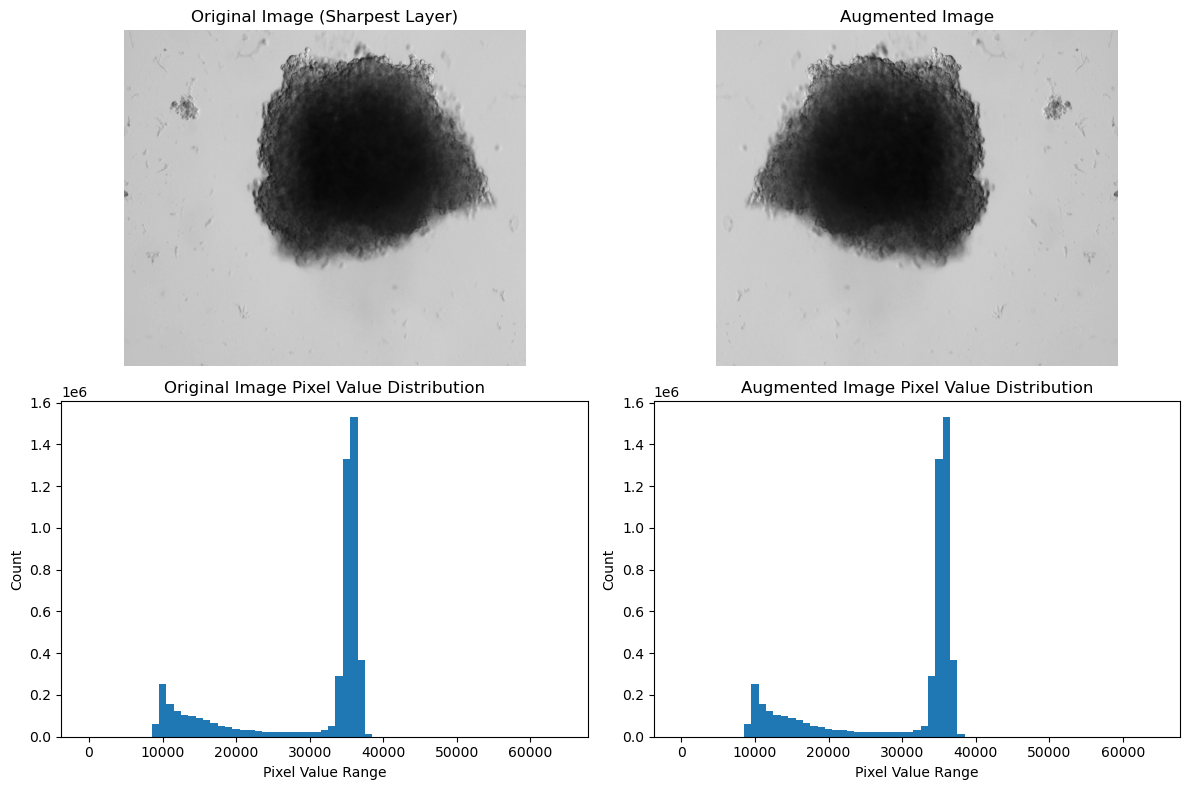

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
#original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=original_image_tensor.shape[1:], scale=(0.8, 1.0)),  # Use tensor size directly
    #transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5)], p=0.8),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image)  # Transformation directly on tensor

# Check if augmented_image is a numpy array and print its type
if isinstance(augmented_image_tensor, torch.Tensor):
    print("augmented_image_tensor is a tensor.")
    print(f"Data type: {augmented_image_tensor.dtype}")
else:
    print("augmented_image_tensor is not a tensor.")

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values in the range 0–65535
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (can adjust the bin width as needed)
    bins = np.arange(0, 65536, 1000)  # 1000-wide bins
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=1000)
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


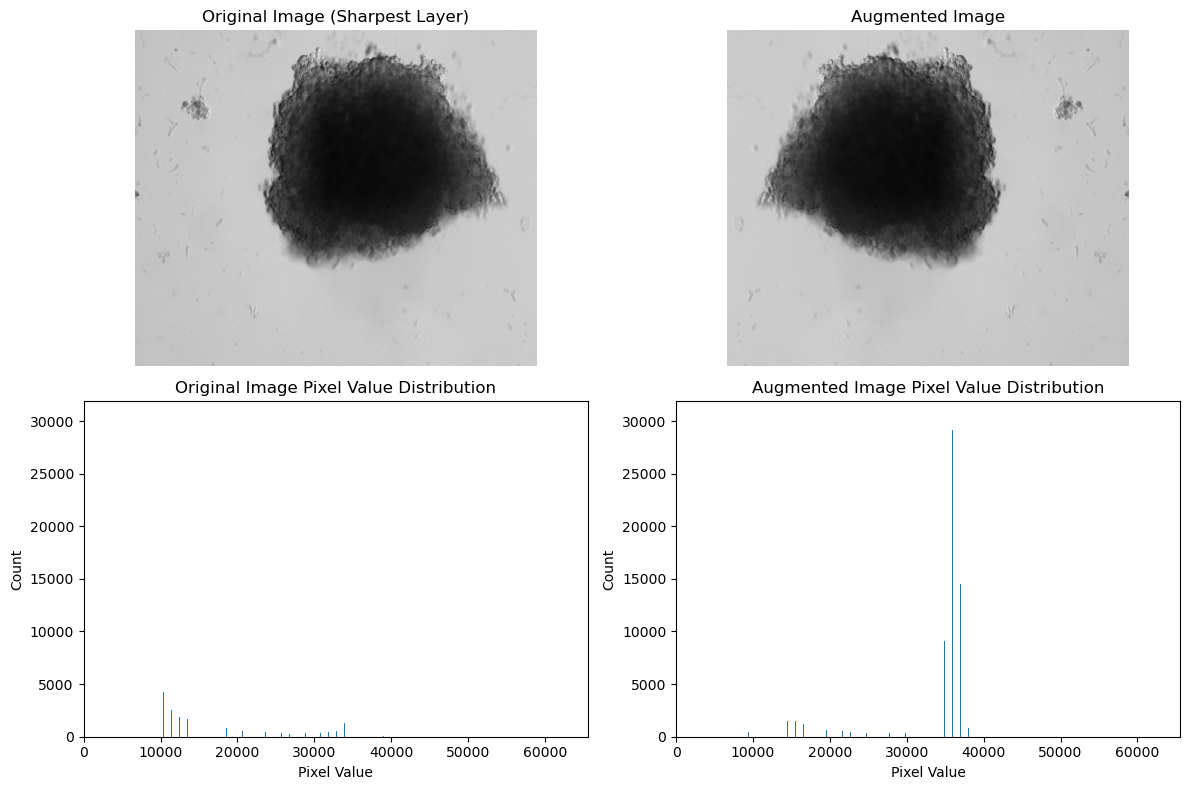

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=original_image_tensor.shape[1:], scale=(0.8, 1.0)),  # Use tensor size directly
    #transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5)], p=0.8),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

# Plotting function to count and plot unique values across the full range
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values in the range 0–65535 with bin size 1
    pixel_values = image.flatten().astype(np.uint16)  # Convert to uint16 to ensure values are in the range
    bins = np.arange(0, 65536)  # Bins for every pixel value from 0 to 65535
    
    # Get histogram of pixel values
    counts, _ = np.histogram(pixel_values, bins=bins)
    
    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], counts, width=1)  # Use width=1 to show each pixel value
    ax.set_title(title)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Count')
    ax.set_xlim([0, 65535])  # Ensure the plot covers the full range

# Create subplots: 2 rows (images + bar plots) and 2 columns (original + augmented)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
